*Теоретический материал:* https://youtu.be/7AiUPTo0Lq4?t=288

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

# Оценка качества обучения нейронной сети в Keras

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=684

In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
# from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


## Bias в нейронных сетях

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=792




In [ ]:
# Создаём нейронку
model = Sequential()                       # Создаём последовательную модель
model.add(Dense(3, input_dim=2))        # Добавляем входной слой Dense(полносвязный) на 3 нейрона, с входным пространством 2
model.add(Dense(4, activation="softmax"))  # Добавляем слой Dense(полносвязный) на 4 нейрона и активационной функцией "softmax"

# Выводим архитектуру нейронки
print(model.summary())

##Загрузка файла

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=1276

In [ ]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

## Загрузка данных

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=1416


In [ ]:
# Загружаем данные из файла sonar.csv
df = pd.read_csv("sonar.csv", header=None)   # header=None, когда данные не имеют строки с заголовками
df.head()                                    # Выводим первые 5 строк наших данных

In [ ]:
print(df.shape) # Размерность данных

In [ ]:
dataset = df.values                 # Берем только значения массива(без индексов)
X = dataset[:,:-1].astype(float)   # Присваиваем им тип данных - float(с плавающей точкой) данным с 0 по 60 колонки
Y = dataset[:,-1]                   # Присваеваем значению Y данные из столбца с индексом 60
Y[Y=='R']='0'                       # Если значение элемента столбца равно 'R', присваеваем ему значение '0'
Y[Y=='M']='1'                       # Если значение элемента столбца равно 'Y', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)
print(X.shape)                      # Выводим размерность X
print(Y.shape)                      # Выводим размерность Y
print(Y)                            

## Создание обучающей, проверочной и тестовой выборки

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=1628



In [ ]:
# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split


# test_size=0.2 - будет выделено 20% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

## Создание нейронной сети

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=1839



In [ ]:
# Функция пересоздаёт пустую сеть
def createModel():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(60, input_dim=60, activation='relu'))
  model.add(Dense(30,  activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Компилируем сеть
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model # Возвращаем созданную сеть

In [ ]:
# Создаём пустую сеть при помощи функции createModel()
model = createModel()

# Обучаем сеть
model.fit(x_train,         
          y_train,         
          batch_size=8,    # Размер батча
          epochs=100,      # Количество эпох
          verbose=1)       # Выводить процесс обучения на каждой эпохе

### Варианты создания проверочной выборки

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=2010


**validation_split**

In [ ]:
# Создаём пустую сеть
model = createModel()

# Обучаем сеть
model.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=100,
          validation_split=0.2, # Указываем 20% случайных примеров для проверочной выборки
          verbose=1)

**validation_data**

In [ ]:
n_val = 40                  # Указываем 40 примеров в проверочную выборку
x_len = x_train.shape[0]    # Запоминаем размер всей выборки целиком
model = createModel()       # Создаём пустую сеть

# Обучаем сеть
model.fit(x_train[:-n_val], # Берём все до индекса 166 - 40 = 126
          y_train[:-n_val], 
          batch_size=8, 
          epochs=100,
          # Прямо указываем данные для проверочной выборки
          # Берём от индекса 126 до конца = 40 примеров
          validation_data=(x_train[-n_val:], y_train[-n_val:]), 
          verbose=1)

**sklearn train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

# Разбиваем датасет на тренировочный и тестовый при помощи функции train_test_split
# x_train_new - новые обучающие данные x
# x_val - новые обучающие данные y
# y_train_new - проверочные данные x
# y_val - проверочные данные y
# test_size=0.2 - 20% на проверочную выборку
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train,
                                                          y_train,
                                                          test_size=0.2)

# Выводим размеры полученных выборок
print(x_train_new.shape)
print(x_val.shape)
print(y_train_new.shape)
print(y_val.shape)

# Создаём пустую сеть
model = createModel()
# Обучаем сеть
model.fit(x_train_new, 
          y_train_new, 
          batch_size=8, 
          epochs=100,
          validation_data=(x_val, y_val), # Указываем проверочную выборку
          verbose=True)

## Проверяем качество обучения на тестовом наборе данных

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=2445



In [9]:
# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=True)

# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

42/42 [==============================] - 0s 690us/sample - loss: 0.6577 - acc: 0.8333
[0.6577268327985492, 0.8333333]
Доля верных ответов на тестовых данных, в процентах: 83.3333%


## Визуализация качества обучения

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=2550




In [10]:
# Создаём пустую сеть
model = createModel() 

# Обучаем сеть
history = model.fit(x_train, 
                    y_train, 
                    batch_size=8, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=0)

Состав словаря History

In [11]:
# Ключи в структуре history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


###  'loss' - значения ошибки на обучающем наборе данных
###  'accuracy' - точность на обучающем наборе данных
###  'val_loss' - значения ошибки на проверочном наборе данных
###  'val_accuracy' - точность на проверочном наборе данных

Печатаем значения ошибки на обучающем наборе данных

In [12]:
# Значения loss на обучающей выборке по эпохам
history.history['loss']

[0.7039751735600558,
 0.6546378749789614,
 0.6425987229202733,
 0.6268042380159552,
 0.6061633698868029,
 0.5869222012433138,
 0.566011930956985,
 0.5459083806384694,
 0.5214440822601318,
 0.4971994071295767,
 0.47720647941936145,
 0.4724887085683418,
 0.4402972035335772,
 0.42154690262043115,
 0.4064284626281623,
 0.39302353154529224,
 0.39654756314826733,
 0.38158568559270917,
 0.35862405733628705,
 0.34886411374265497,
 0.3405409337896289,
 0.33626178087610187,
 0.3187632307861791,
 0.31609239000262634,
 0.3092324494412451,
 0.2911530602158922,
 0.28897593689687323,
 0.2989947804898927,
 0.2842970756870328,
 0.26415506547147577,
 0.2555475648153912,
 0.2629151879386468,
 0.24918714346307697,
 0.23777326354474732,
 0.23225332615953503,
 0.2214094161084204,
 0.2206255653590867,
 0.21287823265249078,
 0.19681496240875937,
 0.18408100894003204,
 0.183223504234444,
 0.17597082708821152,
 0.1895545772982366,
 0.17185075253699766,
 0.16007893780867258,
 0.15329525213349948,
 0.155584890734

Печатаем долю правильных ответов на проверочном наборе данных

In [16]:
import seaborn as sns
sns.set_theme()

In [14]:
# Значения точности распознавания на проверочной выборке по эпохам
val_acc = history.history['val_acc']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 1), "%", sep="")
  # round - округление
  # sep="" - убрать стандартный разделитель пробел при выводе строки

Эпоха: 0 точность: 50.0%
Эпоха: 1 точность: 50.0%
Эпоха: 2 точность: 67.6%
Эпоха: 3 точность: 64.7%
Эпоха: 4 точность: 64.7%
Эпоха: 5 точность: 67.6%
Эпоха: 6 точность: 67.6%
Эпоха: 7 точность: 70.6%
Эпоха: 8 точность: 73.5%
Эпоха: 9 точность: 70.6%
Эпоха: 10 точность: 76.5%
Эпоха: 11 точность: 73.5%
Эпоха: 12 точность: 79.4%
Эпоха: 13 точность: 76.5%
Эпоха: 14 точность: 79.4%
Эпоха: 15 точность: 79.4%
Эпоха: 16 точность: 79.4%
Эпоха: 17 точность: 79.4%
Эпоха: 18 точность: 76.5%
Эпоха: 19 точность: 79.4%
Эпоха: 20 точность: 79.4%
Эпоха: 21 точность: 79.4%
Эпоха: 22 точность: 76.5%
Эпоха: 23 точность: 79.4%
Эпоха: 24 точность: 79.4%
Эпоха: 25 точность: 79.4%
Эпоха: 26 точность: 76.5%
Эпоха: 27 точность: 79.4%
Эпоха: 28 точность: 82.4%
Эпоха: 29 точность: 79.4%
Эпоха: 30 точность: 79.4%
Эпоха: 31 точность: 79.4%
Эпоха: 32 точность: 76.5%
Эпоха: 33 точность: 79.4%
Эпоха: 34 точность: 82.4%
Эпоха: 35 точность: 82.4%
Эпоха: 36 точность: 82.4%
Эпоха: 37 точность: 79.4%
Эпоха: 38 точность: 82

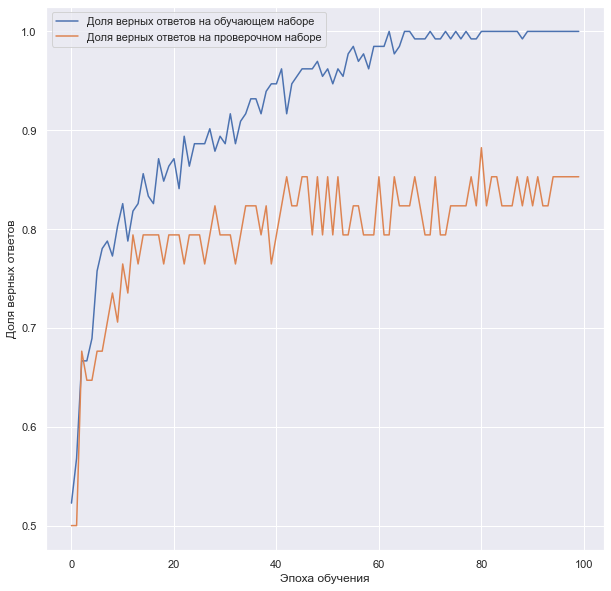

In [17]:
plt.figure(figsize=(10,10))
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['acc'],
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_acc'],
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

In [ ]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Слой Dropout

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=4958




In [18]:
# Создаём сеть
model = Sequential()
model.add(Dropout(0.2, input_shape=(60,)))    # 0.3 означает, что 30% нейронов будут 'выключены'
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Компилируем сеть
# lr=0.001 - размер шага обучения
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Обучаем сеть
history = model.fit(x_train, 
                      y_train, 
                      batch_size=8, 
                      epochs=200,
                      validation_split=0.2, 
                      verbose=0)

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 31        
Total params: 5,521
Trainable params: 5,521
Non-trainable params: 0
____________________________________________________

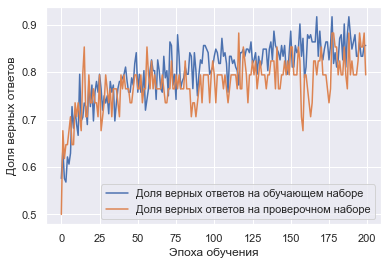

In [20]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['acc'],
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_acc'],
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

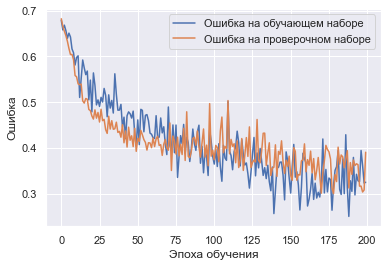

In [21]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [22]:
model.evaluate(x_test, y_test)

42/42 [==============================] - 0s 190us/sample - loss: 0.4633 - acc: 0.7619


[0.4632720067387536, 0.7619048]

## Нормализация

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=5416



In [23]:
model = Sequential()

# Добавляем слой пакетной нормализации
# Теперь input_shape=(60, ) надо указывать в нём
# А не в первом полносвязном слое
model.add(BatchNormalization(input_shape=(60, )))
model.add(Dense(60, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=0)

KeyError: 'accuracy'

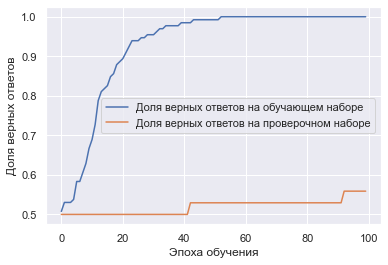

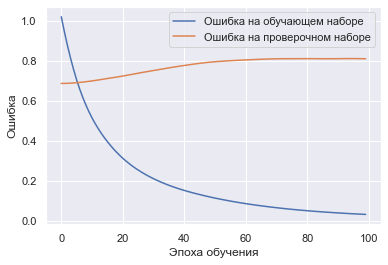

In [25]:
plt.plot(history.history['acc'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

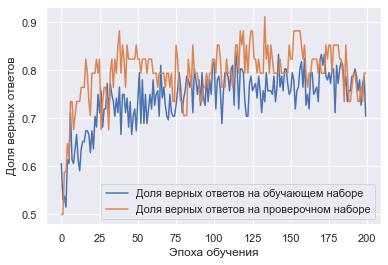

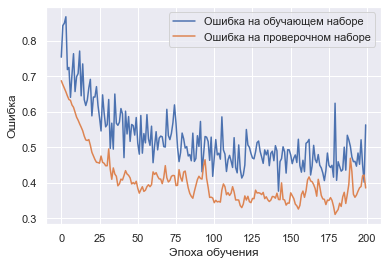

0.7941176
42/42 [==============================] - 0s 309us/sample - loss: 0.5272 - acc: 0.7619


[0.5271822497958228, 0.7619048]

In [75]:
model = Sequential()

# Добавляем слой пакетной нормализации
# Теперь input_shape=(784, ) надо указывать в нём
# А не в первом полносвязном слое
model.add(Dense(560, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(430, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(230, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=8,
                    epochs=200,
                    validation_split=0.2,
                    verbose=0)

plt.plot(history.history['acc'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

print(history.history['val_acc'][-1])
model.evaluate(x_test,y_test)

# Предсказание цен машин с Юлы

*Разбор данного раздела:* https://youtu.be/7AiUPTo0Lq4?t=5735



In [ ]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

In [41]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [ ]:
print(cars.values.shape)

In [49]:
cars.describe(include='object')

,mark,model,body,kpp,fuel
count,70119,70119,70116,70115,70119
unique,21,3156,16,4,5
top,toyota,matiz m150 [рестайлинг],седан,механика,бензин
freq,4043,1062,29455,31053,63719


In [50]:
cars['body'].value_counts()

седан           29455
хетчбэк         12898
кроссовер       12682
минивэн          3725
внедорожник      3563
универсал        3500
лифтбэк          3073
купе              754
пикап             265
хардтоп            80
кабриолет          68
родстер            41
микроавтобус        7
лимузин             2
тарга               2
фастбэк             1
Name: body, dtype: int64

In [76]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [77]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [78]:
print(fuels_dict)

{'газ': 0, 'гибрид': 1, 'бензин': 2, 'дизель': 3, 'электро': 4}


In [80]:
volumes.mean()

1.2879530757014324e-16

In [81]:
volumes.std()

1.0

In [82]:
print(powers)

[ 0.22905575 -0.95630346 -0.87163494 ...  0.22905575 -0.75309902
  2.34576862]


In [83]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [85]:
# Выводим размеры выборок
print(x_train.shape)
print(y_train.shape)

(70119, 3208)
(70119,)


In [86]:
# Выводим один x_train
print(x_train[0,:20])
print(x_train[0,-20:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          1.5200145  -1.40018212
  0.12288486  0.22905575]


In [ ]:
# Выводим y_train
print(y_train[:10])

In [ ]:
y_train.shape

In [ ]:
y_train.reshape(-1,1).shape

In [ ]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

# y_train.reshape(-1,1) добавляет одну размерность
# Это нужно потому, что y_scaler.fit_transform
# Требует двумерны вектор, массив примеров, которые надо нормализовать
# Он не умеет работать с одним примеров
# Поэтому мы делаем массив из одного примера
# На выходе он так же выдаёт массив примеров
# Но нам нужен только первый пример
# Поэтому мы делаем flatten() - уменьшение размерности

In [ ]:
StandardScaler

In [ ]:
y_train_scaled.shape

In [ ]:
# Выводим базовый и нормированный y_train
print(y_train[:10])
print(y_train_scaled[:10])

In [ ]:
y_scaler.inverse_transform(y_train_scaled)

In [ ]:
model_ula = ...
# training
predict = model_ula.predict(x_test)


# Глоссарий

**Типы выборок:**

*   *Обучающая выборка* - основной набор данных, на котором происходит обучение нейронной сети
*   *Проверочная выборка* - набор данных, на котором отслеживается качество работы сети в процессе обучения
*   *Тестовая выборка* - контрольный набор данных, на котором проверяется качество работы обученной сети



**Способы формирования проверочной выборки:**


*   validation_split - указываем процент от обучающей выборки, который будет использоваться в качестве проверочной
*   validation_data - указываем готовые наборы данных, которые будут использоваться в качестве проверочной выборки

**Переобучение сети** - ситуация, при которой сеть "заучила" исходную обучающую выборку и не способна производить обобщение данных (верно распознавать данные из проверочных и тестовых наборов)

**Способы преодоления переобучения:**


*   Dropout - принудительное "отключение" случайного числа нейронов
*   BatchNormalization - нормализация данных на выходе слоя

**StandardScaler** - класс нормализации данных (приводит переданный набор числовых данных к нормальному распределению)

